# MULTI-LAYER PERCEPTRON
## Exploring data
Data: Loan data from Kaggle: https://www.kaggle.com/burak3ergun/loan-data-set

I will design a model that predicts those who paid their loans using the loan data from Kaggle

Variable description from https://rstudio-pubs-static.s3.amazonaws.com/263968_5057ec1f5a2e48a89aab7f568fc37ade.html

<b>not.fully.paid</b>: 1 for custumers who have not paid loan in full and 0 for customers who paid the loan in full.<br>
<b>credit.policy</b>: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise. <br>
<b>purpose</b>: The purpose of the loan (takes values “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other”). <br>
<b>int.rate</b>: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates. <br>
<b>installment</b>: The monthly installments owed by the borrower if the loan is funded. <br>
<b>log.annual.inc</b>: The natural log of the self-reported annual income of the borrower. <br>
<b>dti</b>: The debt-to-income ratio of the borrower (amount of debt divided by annual income). <br>
<b>fico</b>: The FICO credit score of the borrower.<br>
<b>days.with.cr.line</b>: The number of days the borrower has had a credit line. <br>
<b>revol.bal</b>: The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle). <br>
<b>revol.util</b>: The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available). <br>
<b>inq.last.6mths</b>: The borrower’s number of inquiries by creditors in the last 6 months. <br>
<b>delinq.2yrs</b>: The number of times the borrower had been 30+ days past due on a payment in the past 2 years. <br>
<b>pub.rec</b>: The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
# import necessary libraries 

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
# read csv data 

path = 'C:/Users/katia/Documents/Machine learning'
os.chdir(path)

# Check README for where you can find the data
df = pd.read_csv('loan_data.csv')

In [3]:
# Check variables
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# Check descriptive statistics of continuous variables
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
# Check if there are any missing values
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

No missing values. There is no need to fill missing data with means or discard rows.

### Explore continuous variables

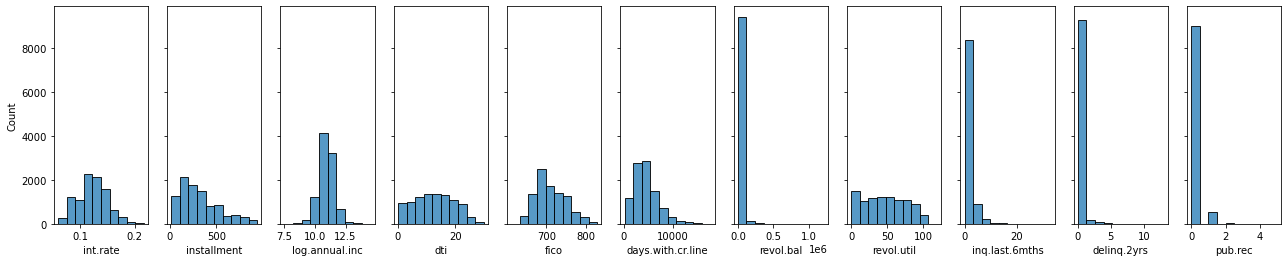

In [6]:
# Histogram

df2 = df.drop(['credit.policy', 'purpose', 'not.fully.paid'], axis = 1)

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(1, 11, sharey=True, figsize = (22,4))

number = 1
for column in df2: 
    ax_val = 'ax' + str(number)
    sns.histplot(df2[column], bins =10, ax = eval(ax_val))
    number += 1


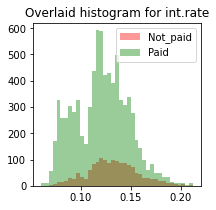

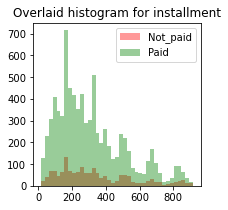

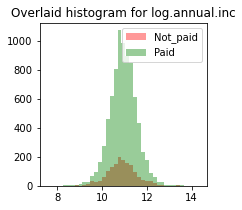

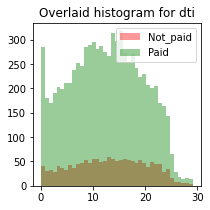

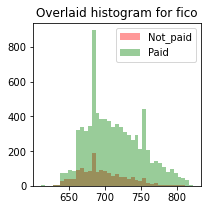

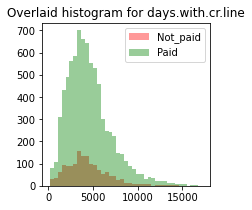

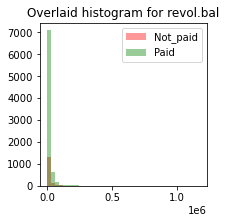

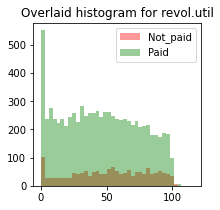

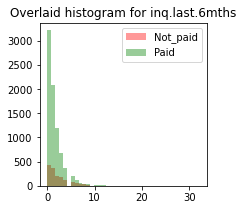

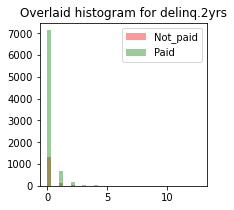

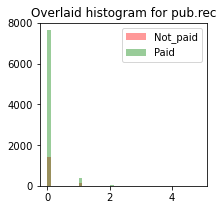

In [7]:
# Overlaid histogram

for column in df2:
    plt.figure(figsize=(3,3))
    not_paid = list(df[df['not.fully.paid'] == 1][column].dropna())
    paid = list(df[df['not.fully.paid'] == 0][column].dropna())
    xmin = min(min(not_paid), min(paid))
    xmax = max(max(not_paid), max(paid))
    width = (xmax - xmin) / 40
    sns.distplot(not_paid, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(paid, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Not_paid', 'Paid'])
    plt.title('Overlaid histogram for {}'.format(column))
    plt.show()

The distribution of values for those who paid and did not finish paying their loans is relatively similar. Box plots can help us see if there are group differences.

Let's explore the relationship with the dependent variable (i.e., payment status) and continuous variables.

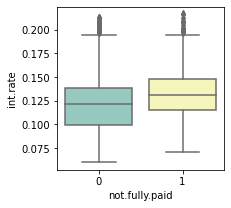

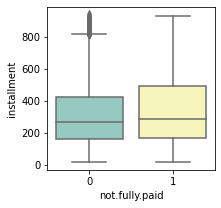

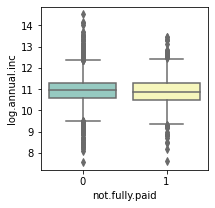

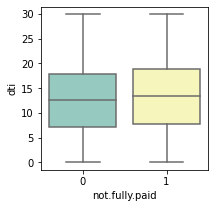

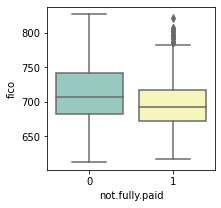

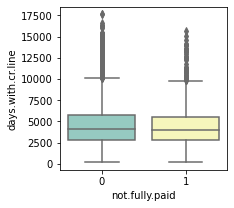

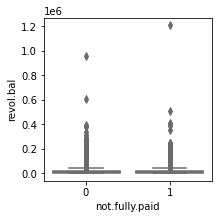

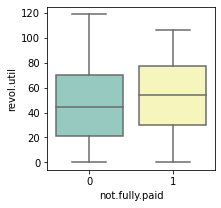

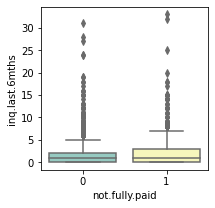

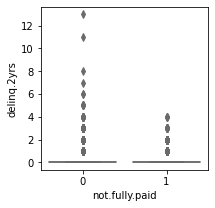

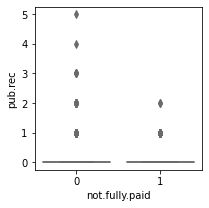

In [8]:
# Boxplots
for column in df2: 
    plt.figure(figsize=(3,3))
    sns.boxplot(df['not.fully.paid'], df[column], palette="Set3")
    plt.show()

No significant group differences were observed. We can explore all variables in the MLP model and see how it performs.

### Distribution of categorical variables

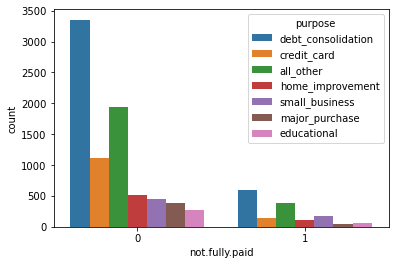

In [9]:
sns.countplot(df['not.fully.paid'], hue = df['purpose'])

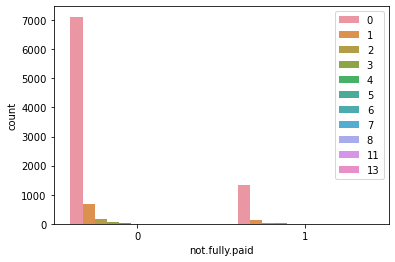

In [10]:
sns.countplot(df['not.fully.paid'], hue = df['delinq.2yrs'])
plt.legend(loc='upper right')

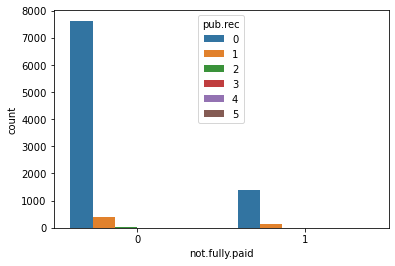

In [11]:
sns.countplot(df['not.fully.paid'], hue = df['pub.rec'])

Again, no stark differences between the group that paid and did not pay their loans are visible.

Let's check for multicollinearity and remove highly correlated variables.

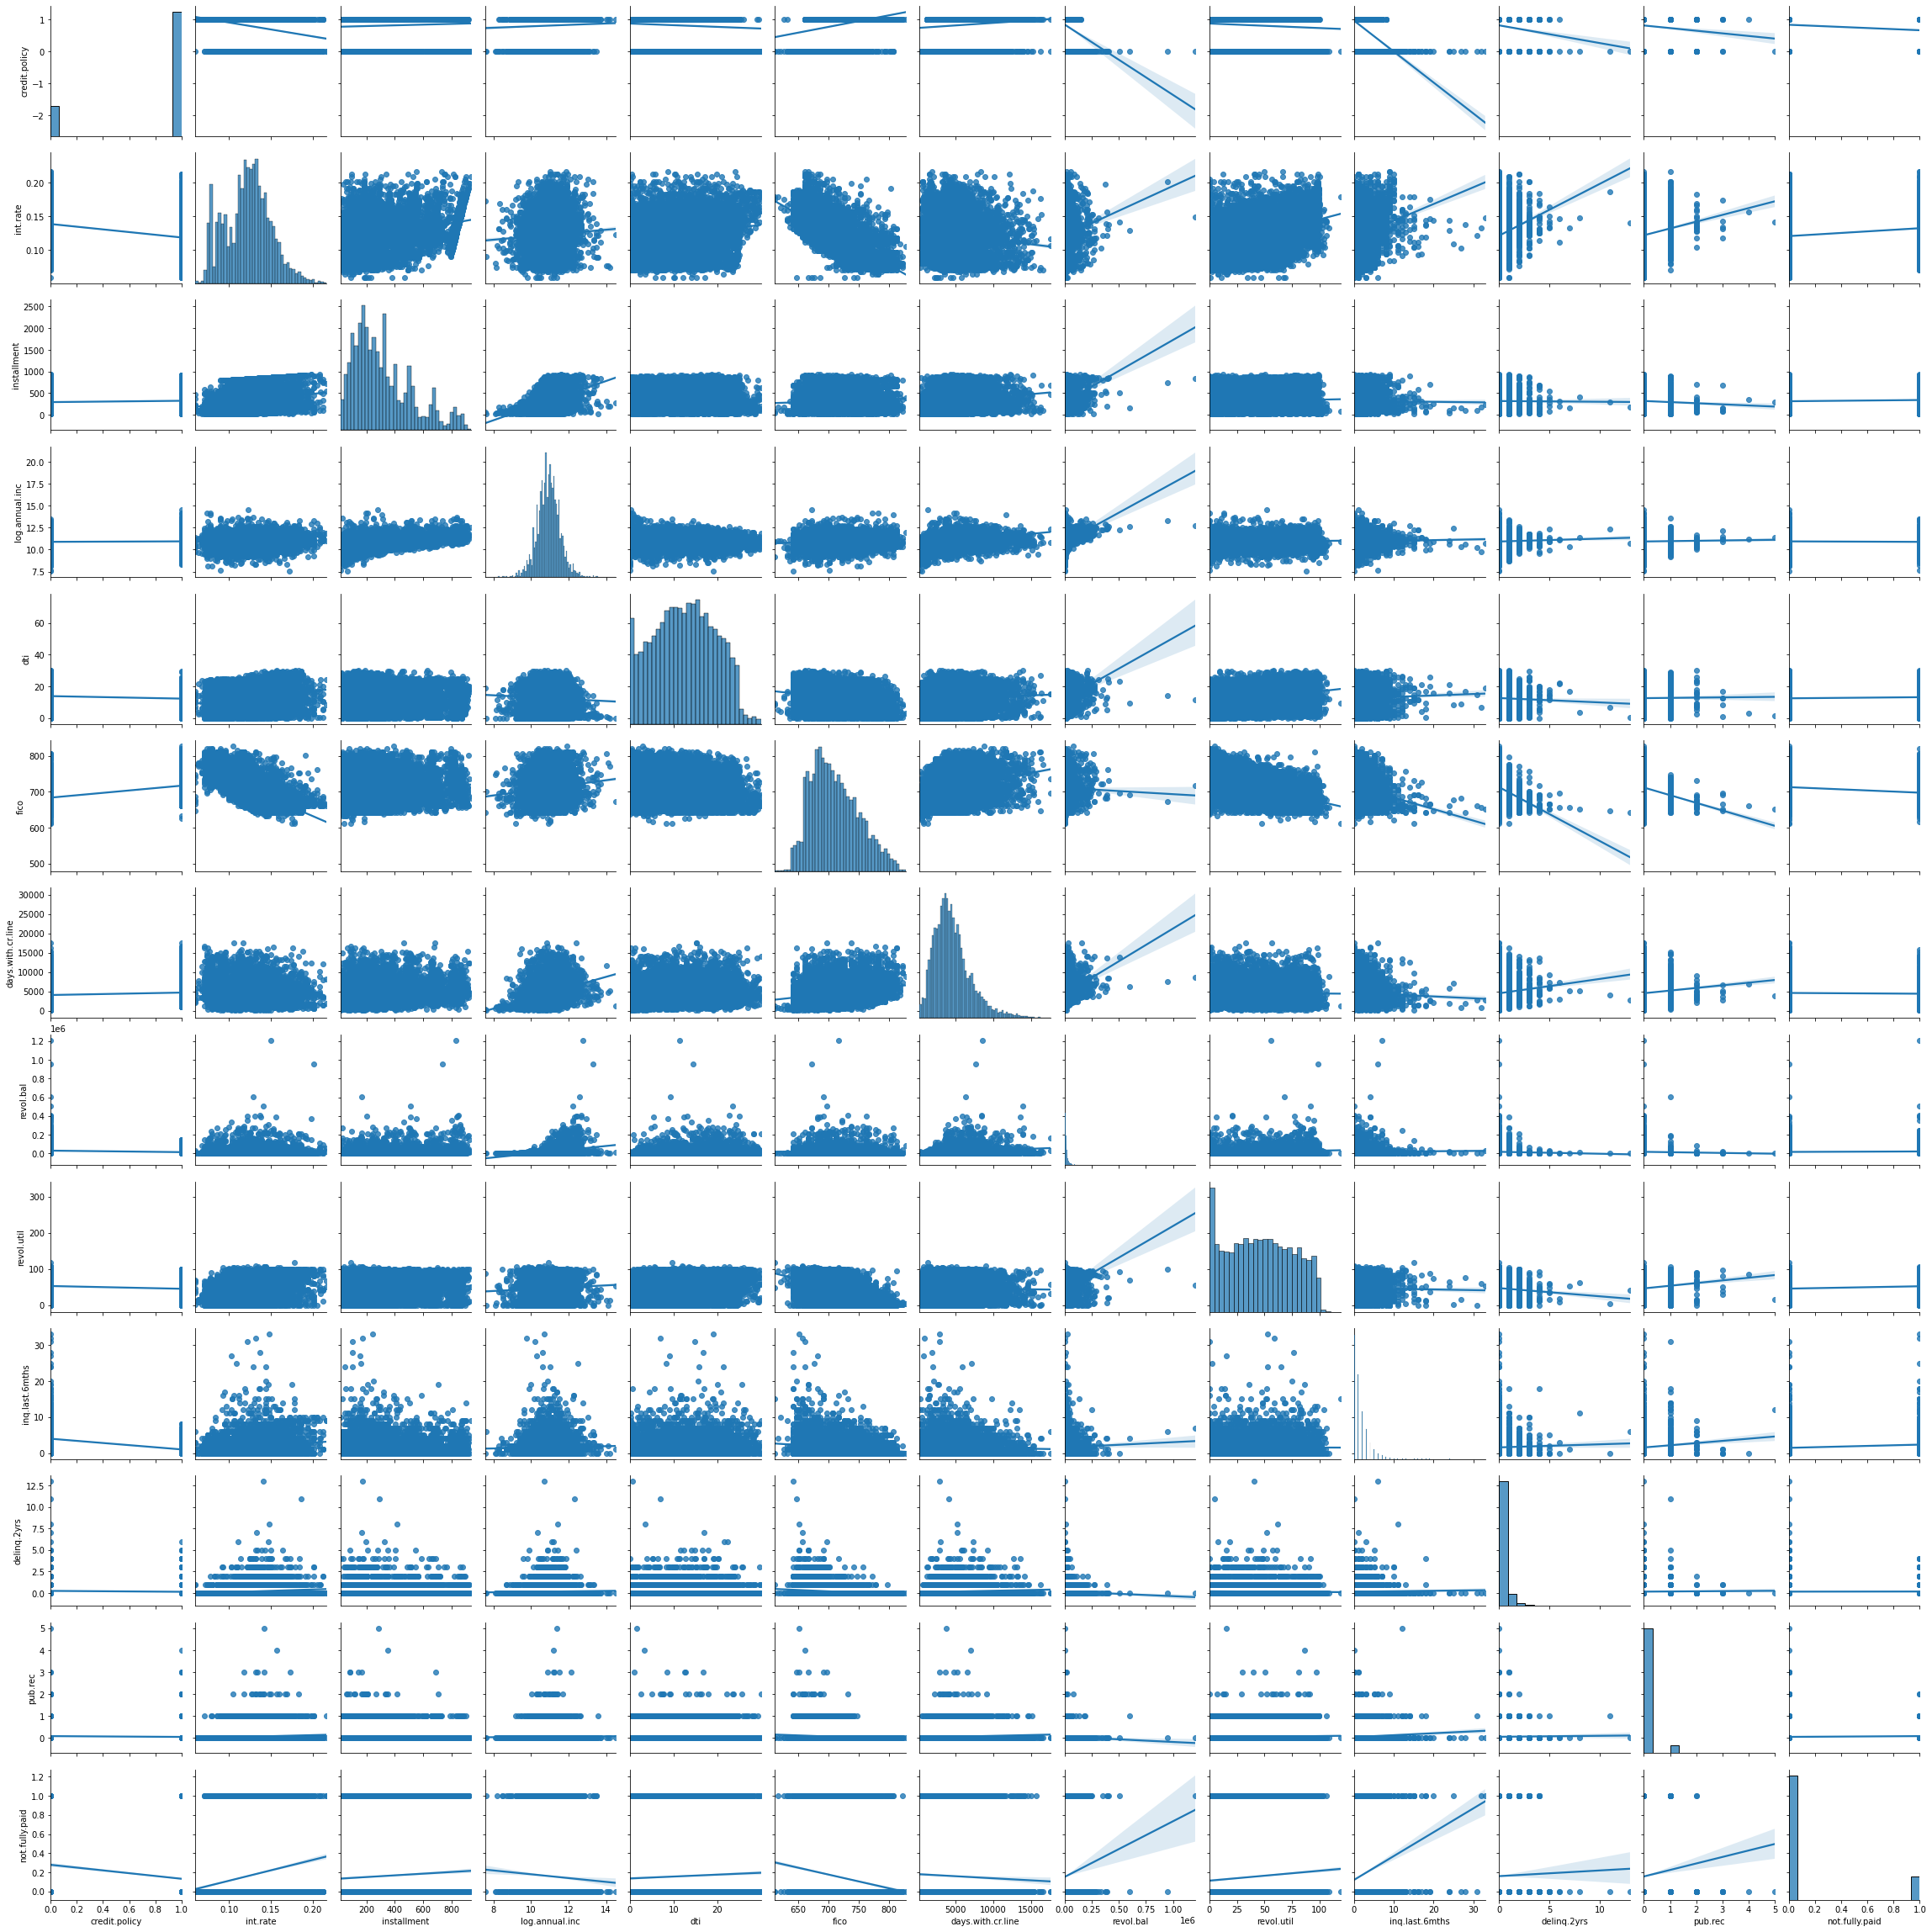

In [12]:
# Pairplot

sns.pairplot(df, kind="reg")

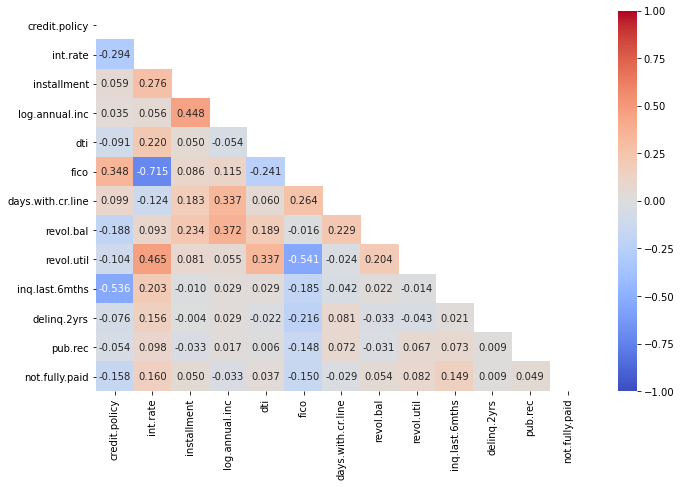

In [12]:
# Generate correlation matrix heat map
plt.figure(figsize = (11, 7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

We should eliminate either fico or int rate.

In [13]:
df.drop(['int.rate'], axis=1, inplace = True)

## Feature engineering

We may want to explore a few new variables: a binary variable discriminating those with or without past due payments, and a binary variable discriminating those with or without public records.

In [14]:
df.groupby('delinq.2yrs')['not.fully.paid'].count()

delinq.2yrs
0     8458
1      832
2      192
3       65
4       19
5        6
6        2
7        1
8        1
11       1
13       1
Name: not.fully.paid, dtype: int64

In [15]:
df.groupby('pub.rec')['not.fully.paid'].count()

pub.rec
0    9019
1     533
2      19
3       5
4       1
5       1
Name: not.fully.paid, dtype: int64

In [16]:
delinq_bi = []
for row in df['delinq.2yrs']:
    if row == 0:
        delinq_bi.append('no')
    else:
        delinq_bi.append('yes')
df['delinq_bi'] = delinq_bi

In [17]:
pub_rec_bi = []
for row in df['pub.rec']:
    if row == 0:
        pub_rec_bi.append('no')
    else:
        pub_rec_bi.append('yes')
df['pub_rec_bi'] = pub_rec_bi

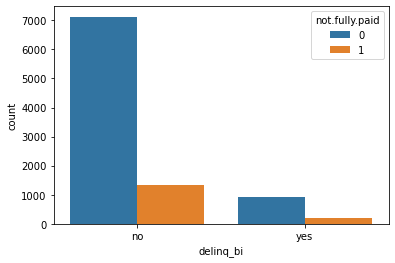

In [18]:
sns.countplot(df['delinq_bi'], hue = df['not.fully.paid'])

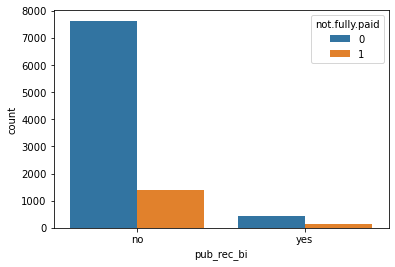

In [19]:
sns.countplot(df['pub_rec_bi'], hue = df['not.fully.paid'])

The plots suggest a smaller difference in presence of public records and past due payments in the group which did not pay loan. The new variables may not be stronger predictors.

## Changing categorical variables into numbers

In [20]:
from sklearn.preprocessing import LabelEncoder

for variable in ['delinq_bi', 'pub_rec_bi', 'purpose']:
    le = LabelEncoder()
    df[variable] = le.fit_transform(df[variable].astype(str))
    
df.head()

,credit.policy,purpose,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,delinq_bi,pub_rec_bi
0,1,2,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0
1,1,1,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,0
2,1,2,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0
3,1,2,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0
4,1,1,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0


## Removing outliers

In [21]:
# Define function to check for outliers according to three benchmarks: 95th quantile, 99th quantile, and 3SDs

def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [22]:
# check outliers

for variable in df:
    outlier(variable)



Outlier caps for credit.policy:
  --95p: 1.0 / 0 values exceed that
  --3sd: 2.0 / 0 values exceed that
  --99p: 1.0 / 0 values exceed that

Outlier caps for purpose:
  --95p: 6.0 / 0 values exceed that
  --3sd: 7.0 / 0 values exceed that
  --99p: 6.0 / 0 values exceed that

Outlier caps for installment:
  --95p: 756.3 / 479 values exceed that
  --3sd: 940.3 / 0 values exceed that
  --99p: 870.4 / 107 values exceed that

Outlier caps for log.annual.inc:
  --95p: 11.9 / 438 values exceed that
  --3sd: 12.8 / 86 values exceed that
  --99p: 12.5 / 96 values exceed that

Outlier caps for dti:
  --95p: 23.6 / 478 values exceed that
  --3sd: 33.3 / 0 values exceed that
  --99p: 26.2 / 96 values exceed that

Outlier caps for fico:
  --95p: 782.0 / 403 values exceed that
  --3sd: 824.8 / 1 values exceed that
  --99p: 802.0 / 90 values exceed that

Outlier caps for days.with.cr.line:
  --95p: 9330.0 / 478 values exceed that
  --3sd: 12051.2 / 142 values exceed that
  --99p: 12930.0 / 96 values

In [23]:
# Remove outliers based on 99 quantile (only continuous variables)

for column in df[['installment', 'log.annual.inc','dti','fico', 'log.annual.inc', 
                  'revol.bal','inq.last.6mths', 'delinq.2yrs','pub.rec']]:
    df[column]= df[column].clip(upper=df[column].quantile(.99))


In [24]:
df.describe()

,credit.policy,purpose,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,delinq_bi,pub_rec_bi
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,318.908239,10.927838,12.589650,710.765922,4560.767197,15959.352859,46.799236,1.529234,0.149309,0.058363,0.160054,0.116935,0.058363
std,0.396245,1.686881,206.573372,0.600847,6.847211,37.765334,2496.930377,23978.685792,29.014417,1.906072,0.441157,0.234441,0.366676,0.321359,0.234441
min,0.000000,0.000000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,163.770000,10.558414,7.212500,682.000000,2820.000000,3187.000000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,268.950000,10.928884,12.665000,707.000000,4139.958333,8596.000000,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,432.762500,11.291293,17.950000,737.000000,5730.000000,18249.500000,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,870.390000,12.483904,26.242300,802.000000,17639.958330,156762.580000,119.000000,9.000000,2.230000,1.000000,1.000000,1.000000,1.000000


## Transform skewed variables

In [25]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

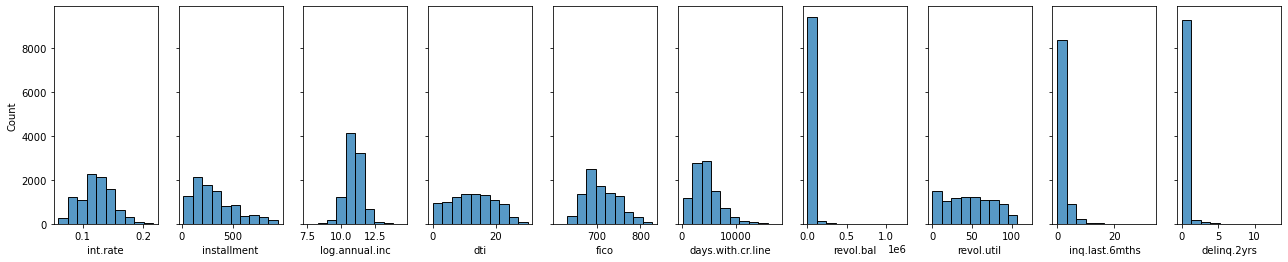

In [26]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, sharey=True, figsize = (22,4))

number = 1
for column in df2: 
    ax_val = 'ax' + str(number)
    sns.histplot(df2[column], bins =10, ax = eval(ax_val))
    number += 1

The variables that need transformation are: 'installment','days.with.cr.line', 'revol.bal', 'inq.last.6mths'

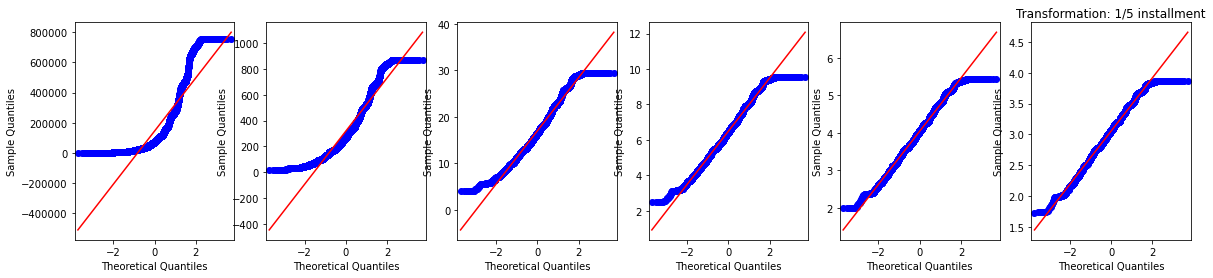

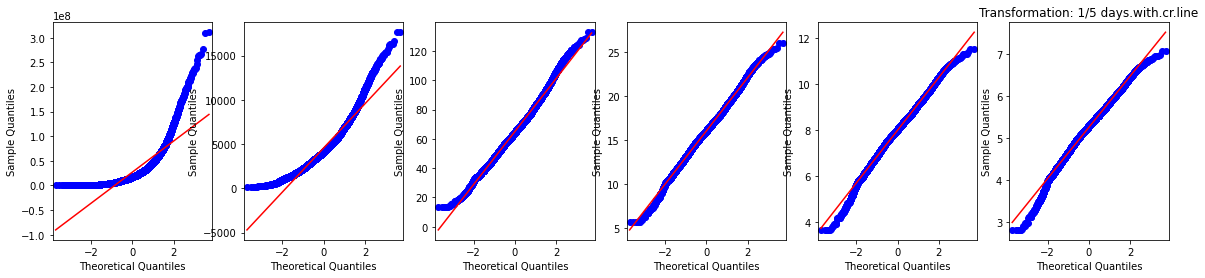

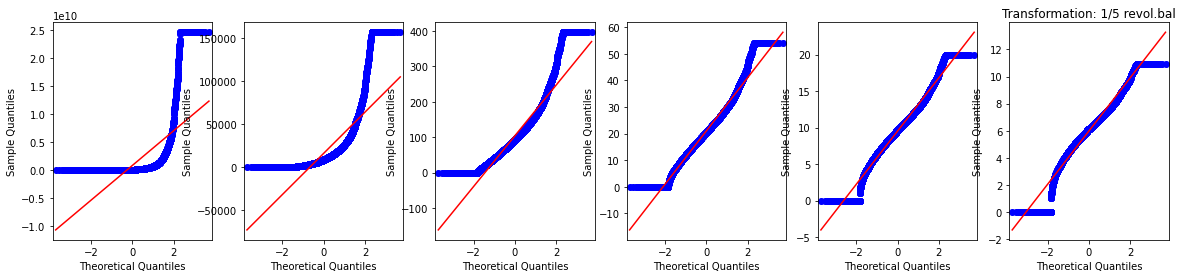

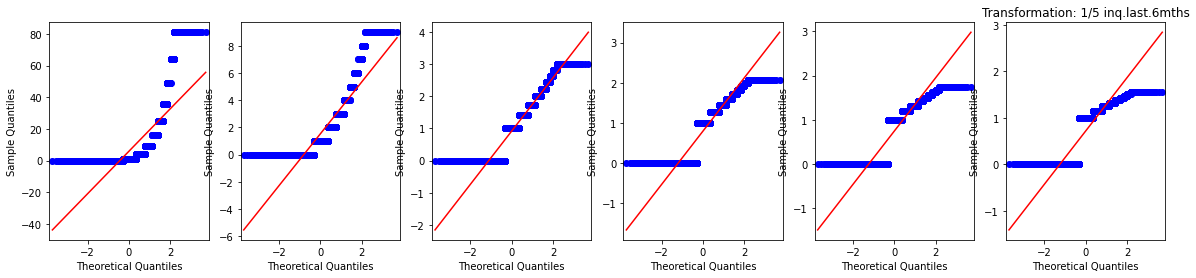

In [27]:
# Generate QQ plots to select best transformation for continuous variables

for column in df[['installment','days.with.cr.line', 'revol.bal', 'inq.last.6mths']]:
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (20,4), sharey = False)
    number = 1
    for i in [0.5, 1, 2, 3, 4, 5]:
        data = df[column]**(1/i)
        ax_val = 'ax' + str(number)
        qqplot(data, line='s', ax = eval(ax_val))
        plt.title("Transformation: 1/" + str(i) + " " + column.format(str(i)))
        number += 1

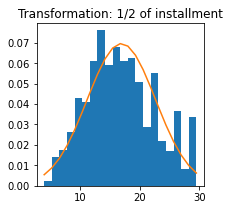

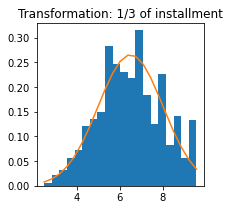

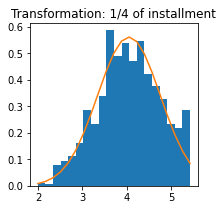

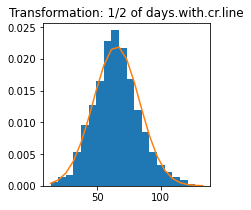

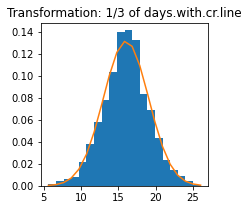

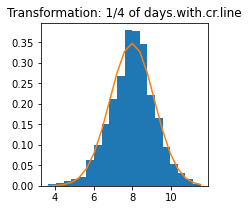

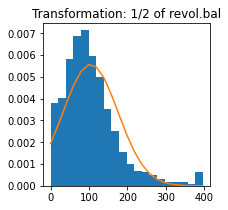

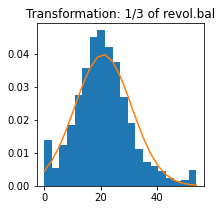

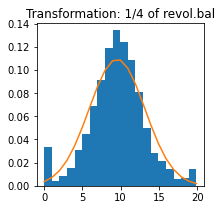

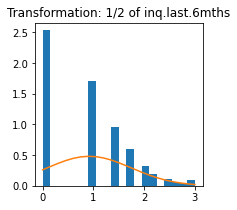

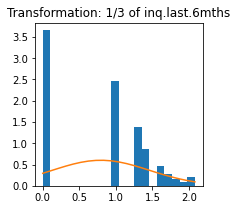

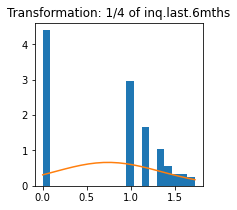

In [28]:
# Box-Cox transformation

for column in df[['installment','days.with.cr.line', 'revol.bal', 'inq.last.6mths']]:
    for i in [2, 3, 4]:
        plt.figure(figsize=(3,3))
        data = df[column]**(1/i)
        n, bins, patches = plt.hist(data, 20, density=True)
        mu = np.mean(data)
        sigma = np.std(data)
        plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
        plt.title("Transformation: 1/" + str(i) + " of " + str(column))
        plt.show()

The best transformations for each variables seems to be: 1/2, 1/3, 1/4 and 1/2 respectively.

In [29]:
# Create the new transformed variable
df['installment'] = df['installment'].apply(lambda x: x**1/2)
df['days.with.cr.line'] = df['days.with.cr.line'].apply(lambda x: x**(1/3))
df['revol.bal'] = df['revol.bal'].apply(lambda x: x**(1/4))
df['inq.last.6mths'] = df['inq.last.6mths'].apply(lambda x: x**(1/2))
df.head()

,credit.policy,purpose,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,delinq_bi,pub_rec_bi
0,1,2,414.55,11.350407,19.48,737,17.800217,13.033213,52.1,0.0,0.0,0,0,0,0
1,1,1,114.11,11.082143,14.29,707,14.027158,13.541261,76.7,0.0,0.0,0,0,0,0
2,1,2,183.43,10.373491,11.63,682,16.762558,7.697642,25.6,1.0,0.0,0,0,0,0
3,1,2,81.17,11.350407,8.10,712,13.924695,13.545689,73.2,1.0,0.0,0,0,0,0
4,1,1,51.46,11.299732,14.97,667,15.960842,8.297449,39.5,0.0,1.0,0,0,1,0


## Create training and test sets

In [31]:
from sklearn.model_selection import train_test_split

labels = df['not.fully.paid']
df = df.drop(['not.fully.paid'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,credit.policy,purpose,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,delinq_bi,pub_rec_bi
2076,1,6,50.200,10.126631,3.65,712,12.986179,7.543436,10.4,0.0,0.0,0,0,0
5785,1,2,46.350,10.896739,13.67,797,21.493989,8.806613,43.9,1.0,0.0,0,0,0
3397,1,4,433.080,11.695247,16.28,702,19.147513,16.451757,60.0,0.0,0.0,0,0,0
9158,0,1,418.330,11.429544,18.43,727,14.705362,14.222587,35.5,2.0,0.0,0,0,0
705,1,2,188.895,10.353161,23.31,712,15.577482,9.695634,52.6,1.0,0.0,0,0,0


In [32]:
# Check length of sets
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Standardize variables

In [33]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [34]:
# Scale the training, test, and validation sets
variables = X_train.columns

X_train[variables] = scaler.transform(X_train[variables])
X_val[variables] = scaler.transform(X_val[variables])
X_test[variables] = scaler.transform(X_test[variables])

X_train.head()

C:\Users\katia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\katia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,credit.policy,purpose,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,delinq_bi,pub_rec_bi
2076,0.496136,2.408223,-1.062324,-1.359205,-1.298055,0.026496,-1.014687,-0.532237,-1.250652,-1.119760,-0.33981,-0.253518,-0.364536,-0.253518
5785,0.496136,0.040688,-1.099884,-0.066720,0.162066,2.255749,1.801858,-0.189513,-0.094716,0.082283,-0.33981,-0.253518,-0.364536,-0.253518
3397,0.496136,1.224456,2.672940,1.273428,0.542397,-0.235769,1.025047,1.884764,0.460824,-1.119760,-0.33981,-0.253518,-0.364536,-0.253518
9158,-2.015578,-0.551196,2.529043,0.827494,0.855696,0.419893,-0.445545,1.279947,-0.384562,1.284325,-0.33981,-0.253518,-0.364536,-0.253518
705,0.496136,0.040688,0.290743,-0.979016,1.566813,0.026496,-0.156826,0.051696,0.205483,0.082283,-0.33981,-0.253518,-0.364536,-0.253518


## Separate original set from others 

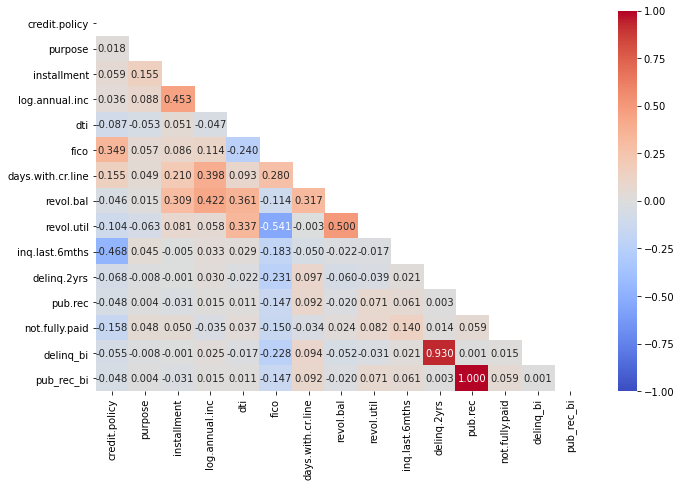

In [30]:
# Generate correlation matrix heat map to eliminate redundant variables
plt.figure(figsize = (11, 7))

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

Because no variables stand out as strong predictors, let's create a reduced set with theorectically sound variables. 

In [35]:
# Get a list of the variables

list = []
for column in df:
    list.append(column)
print(list)

['credit.policy', 'purpose', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'delinq_bi', 'pub_rec_bi']


In [36]:
df_original = ['credit.policy', 'purpose', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 
               'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
df_featured = ['credit.policy', 'purpose', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 
               'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq_bi', 'pub_rec_bi']
df_reduced = ['installment', 'log.annual.inc', 'dti', 'fico', 'revol.util', 'pub.rec']


In [37]:
X_train_original = X_train[df_original]
X_val_original = X_val[df_original]
X_test_original = X_test[df_original]

X_train_featured = X_train[df_featured]
X_val_featured = X_val[df_featured]
X_test_featured = X_test[df_featured]

X_train_reduced = X_train[df_reduced]
X_val_reduced = X_val[df_reduced]
X_test_reduced = X_test[df_reduced]

## Build Models

In [38]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [39]:
# Define functions to get relevant metrics about models

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Model with original variables

In [41]:
# Try different

mlp = MLPClassifier()
parameters = {'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train_original, y_train.values.ravel())

print_results(cv)

C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.836 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.837 (+/-0.001) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.837 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.832 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.833 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.833 (+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.828 (+/-0.006) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.832 (+/-0.01) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.829 (+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'le

In [42]:
cv.best_estimator_

MLPClassifier(activation='logistic')

In [44]:
joblib.dump(cv.best_estimator_, '../MLP_model_original.pkl')

['../MLP_model_original.pkl']

### Model with new features

In [45]:
cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train_featured, y_train.values.ravel())

print_results(cv)

C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.837 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.839 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.837 (+/-0.001) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.832 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.83 (+/-0.01) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.83 (+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.828 (+/-0.008) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.83 (+/-0.01) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.828 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learni

In [46]:
cv.best_estimator_

MLPClassifier(activation='logistic', learning_rate='adaptive')

In [47]:
joblib.dump(cv.best_estimator_, '../MLP_model_featured.pkl')

['../MLP_model_featured.pkl']

### Model with reduced variables

In [48]:
cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train_reduced, y_train.values.ravel())

print_results(cv)

C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\katia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}

0.838 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.839 (+/-0.002) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.838 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.837 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.837 (+/-0.005) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.838 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.837 (+/-0.004) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.837 (+/-0.005) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.837 (+/-0.007) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lear

In [49]:
cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(10,), learning_rate='invscaling')

In [60]:
joblib.dump(cv.best_estimator_, '../MLP_model_reduced.pkl')

['../MLP_model_reduced.pkl']

## Compare models

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [66]:
# Read in models
models = {}

for mdl in ['original', 'featured', 'reduced']:
    models[mdl] = joblib.load('../MLP_model_{}.pkl'.format(mdl))

In [67]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [68]:
# Evaluate all of our models on the validation set
evaluate_model('Original Variables', models['original'], X_val_original, y_val)
evaluate_model('Featured Variables', models['featured'], X_val_featured, y_val)
evaluate_model('Reduced Variables', models['reduced'], X_val_reduced, y_val)

Original Variables -- 	Accuracy: 0.834 / Precision: 0.333 / Recall: 0.003 / Latency: 11.0ms
Featured Variables -- 	Accuracy: 0.835 / Precision: 1.0 / Recall: 0.003 / Latency: 10.0ms
Reduced Variables -- 	Accuracy: 0.834 / Precision: 0.0 / Recall: 0.0 / Latency: 5.0ms


In [69]:
# Evaluate our final model on the test set
evaluate_model('Featured Variables', models['featured'], X_test_featured, y_test)

Featured Variables -- 	Accuracy: 0.849 / Precision: 1.0 / Recall: 0.003 / Latency: 9.0ms


The model with featured variables has higher precision and accuracy and is faster than the original model. All models have poor recall.

In [72]:
MLP = MLPClassifier(activation= 'logistic', hidden_layer_sizes= (100,), learning_rate= 'adaptive')
model = MLP.fit(X_test_original, y_test)

In [74]:
from sklearn import metrics
import numpy as np

# perform predictions on the test set
y_pred = model.predict(X_test_featured) 
prediction_test = y_pred.tolist()


In [77]:
# Confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, prediction_test)
cnf_matrix

array([[1626,    0],
       [ 286,    4]], dtype=int64)

As expected from the data visualization, the relationship between the independent and dependent variables was not very strong so that the resultant models had poor recall. Other algorithms could be tested.